k邻近：
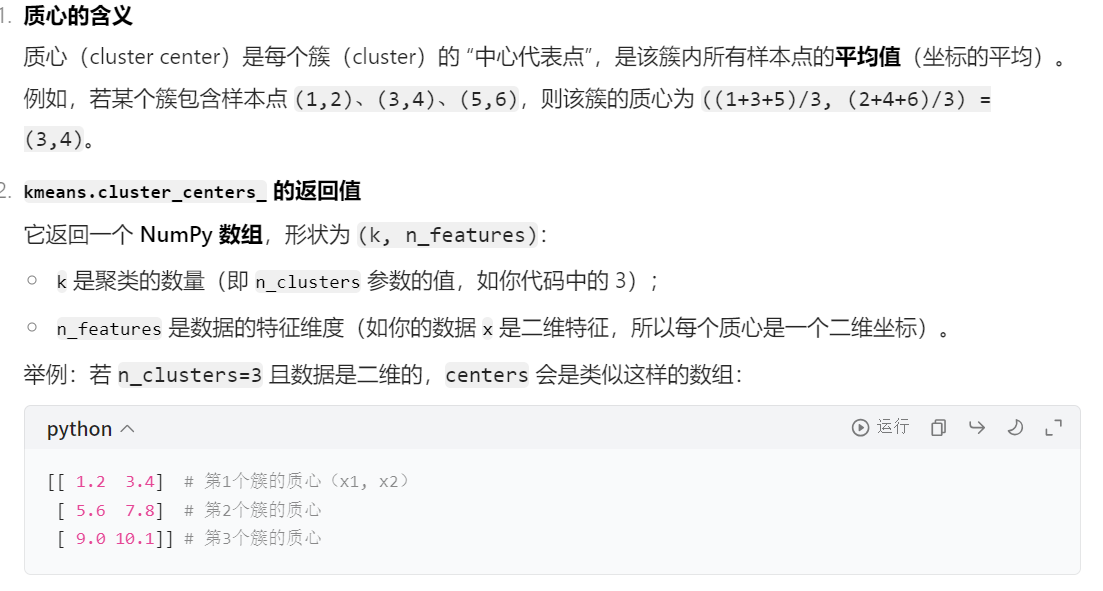
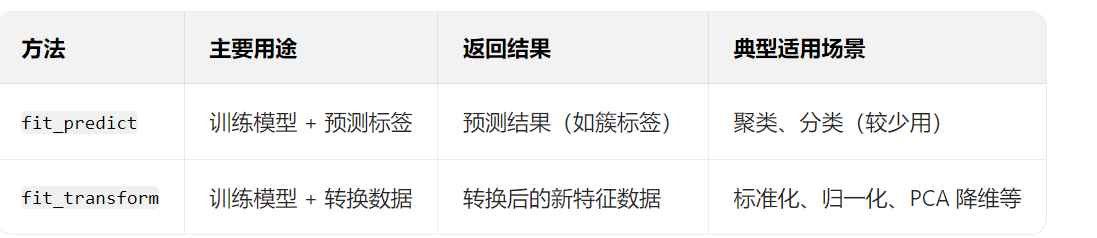
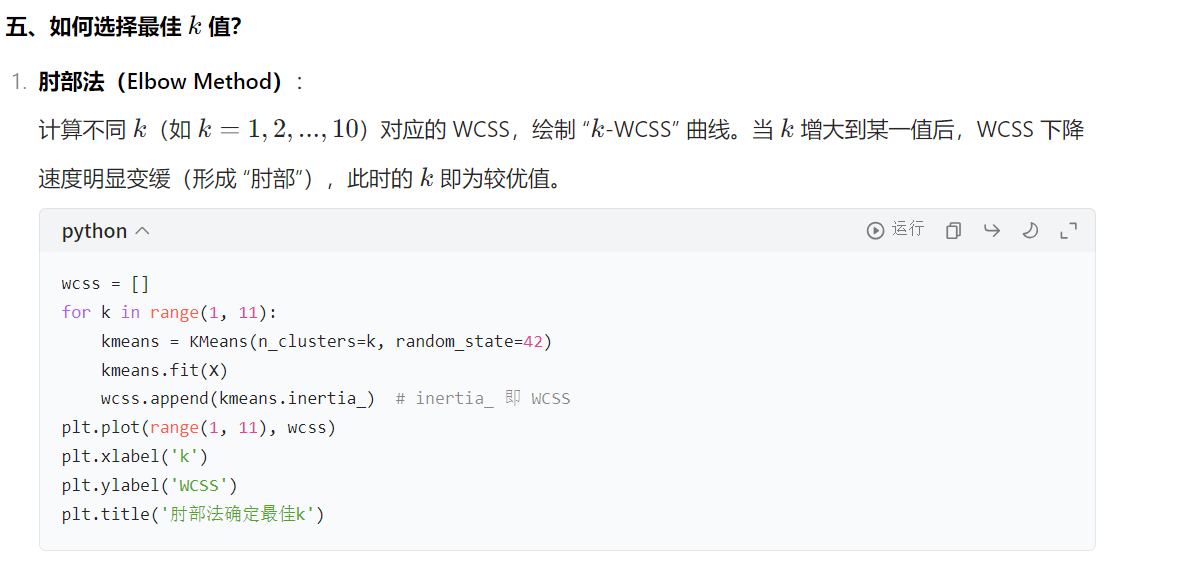

In [ ]:
import scipy.io as sio
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
data = sio.loadmat(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex7-kmeans and PCA\data\ex7data1.mat")
x = data["X"]#无监督学习，没有y

#选择最佳k值
w=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)#简单说，n_clusters 决定了 “分几组”，random_state 保证了 “结果可重复”，与大小无关
    kmeans.fit(x)
    w.append(kmeans.inertia_)  # inertia_ 即 WCSS
plt.plot(np.arange(10),w)
#用最佳k值来训练
kmeans=KMeans(n_clusters=3,random_state=42)
x_K = kmeans.fit_predict(x)#直接得到训练预测结果
print(x_K)#针对每一个数返回其所属于的标签
centers = kmeans.cluster_centers_  # 获取聚类中心
print(centers)#质心坐标

# 可视化设置
plt.figure(figsize=(10, 6))

# 绘制数据点，不同簇用不同颜色
plt.scatter(x[:, 0], x[:, 1], c=x_K, s=50, cmap='jet')

# 绘制聚类中心，用黑色星号标记
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='*')#centers[:, 0] 取所有质心的第 1 个特征值（横轴），centers[:, 1] 取第 2 个特征值（纵轴）。

# 添加标题和标签
plt.legend()  # 显示图例
plt.show()